In [1]:
## Fast Import
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys, os
import pathlib
import time
import math, random
from collections import OrderedDict
import pprint
import yaml

import cv2
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch, torchvision
import torch.nn as nn
import torch.nn.functional as F

from lib import data, modules, utils
from lib.data import transforms
curr_path = pathlib.Path(os.getcwd()).absolute()

[['crop',
  (0.7658121516408067,
   0.9097240477647295,
   0.12763728237354255,
   0.05806750824132321)],
 ['resize', [384, 384]],
 ['gaussianblur', 0],
 ['hflip', True],
 ['bcsh.jitter', [0.6635530774683603, 1.1998177974113124, 9.66769406493717, 0]],
 ['rtss.affine', [0.0, [0.0, 0.0], 1, [0.0, 0.0]]],
 ['totensor', True],
 ['normmeanstd', [[0.15001505461961784], [0.10547640998002673]]]]
[['resize', [294, 349]],
 ['hflip', True],
 ['bcsh.jitter',
  [1.5070384479494516, 0.8334598821234084, 0.10343728228087025, 0]],
 ['rtss.affine', [-0.0, [0, 0], 1.0, [-0.0, -0.0]]],
 ['topil', True],
 ['normmeanstd', [[0.15001505461961784], [0.10547640998002673]]]]
[['resize', [294, 349]],
 ['hflip', True],
 ['rtss.affine', [-0.0, [0, 0], 1.0, [-0.0, -0.0]]],
 ['topil', True]]


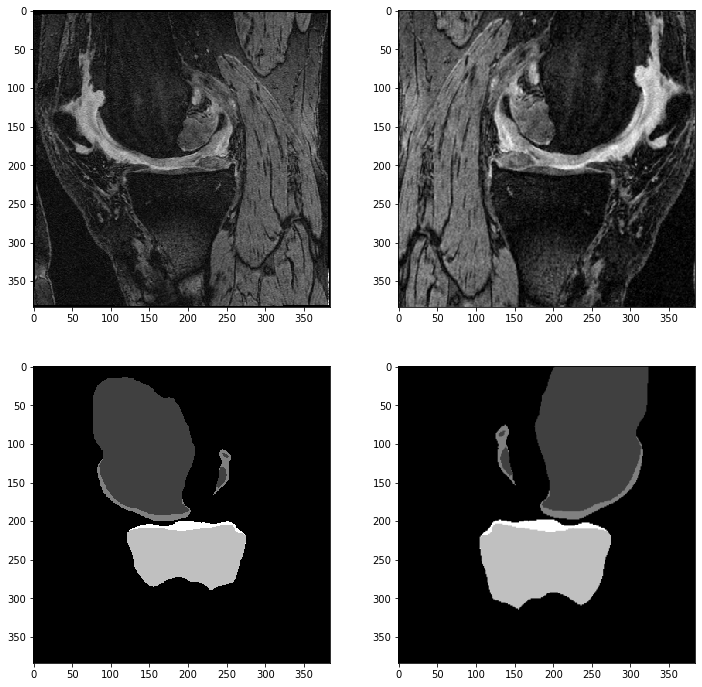

In [115]:
mri = Image.open('tests/mri.png')
mrim = Image.open('tests/mri_mask.png')
tcfg = [
    ['crop', [(0.6,1),(0.6,1)]],  # size or ratio
    ['resize', 384],
    ['gaussianblur', (0,1)],
    # ['togray', True],
    ['hflip', 0.5],
    # ['vflip', 0.5],
    # ['gamma', 0.5],
    ['bcsh.jitter', [0.4, 0.25, 20, 0]], 
    ['rtss.affine', [0, 0, 0, 0]],
    ['totensor', True],
    ['normmeanstd', [[0.15001505461961784], [0.10547640998002673]]],
]

T = transforms.GeneralTransform(tcfg)
tmri, tmri_tok = T.transform(mri, token=True)
tmrim, tmrim_tok = T.transform(mrim, label=True, token=True)
# utim = T.reverse(tim, tok)

# tmri = T.reverse(tmri, tmri_tok, only_unnorm=True)
# tmrim = T.reverse(tmrim, tmrim_tok, only_unnorm=True)

if isinstance(tmri, torch.Tensor):
    tmri = tmri.permute(1, 2, 0).squeeze()
if isinstance(tmri, torch.Tensor):
    tmrim = tmrim.permute(1, 2, 0).squeeze()

pprint.pprint(T.transforms_det)
pprint.pprint(tmri_tok)
pprint.pprint(tmrim_tok)
fig = plt.figure(figsize=(12,12))
fig.add_subplot(2,2,1).imshow(mri, cmap='gray')
fig.add_subplot(2,2,2).imshow(tmri, cmap='gray')
fig.add_subplot(2,2,3).imshow(mrim, cmap='gray')
fig.add_subplot(2,2,4).imshow(tmrim, cmap='gray')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
[['crop',
  (0.678231073056599,
   0.9253610928107248,
   0.28943299495580843,
   0.05746981565550441)],
 ['resize', [384, 384]],
 ['hflip', True],
 ['bcsh.jitter', [0.875679893171508, 1.1439469821714479, 1, 0]],
 ['rtss.affine', [0.0, [0.0, 0.0], 1, [0.0, 0.0]]],
 ['totensor', True],
 ['normmeanstd', [[0.45, 0.45, 0.45], [0.25, 0.25, 0.25]]]]


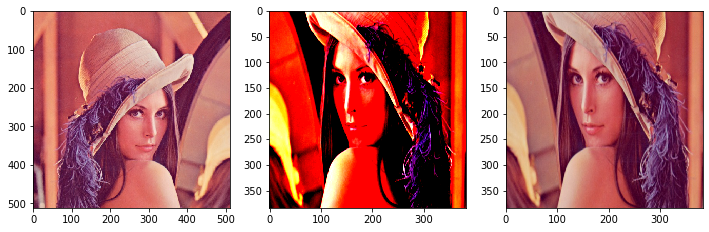

In [93]:
im = Image.open('tests/csample.png').convert('RGB')
tcfg = [
    ['crop', [(0.6,1),(0.6,1)]],  # size or ratio
    ['resize', 384],
    # ['togray', True],
    ['hflip', 0.5],
    # ['vflip', 0.5],
    # ['gamma', 0.5],
    ['bcsh.jitter', [0.25, 0.25, 0, 0]], 
    ['rtss.affine', [0, 0, 0, 0]],
    ['totensor', True],
    ['normmeanstd', [[0.45]*3, [0.25]*3]],
]

T = transforms.GeneralTransform(tcfg)
tim, tok = T.transform(im, token=True)
rim = T.reverse(tim, tok, only_unnorm=True)


pprint.pprint(T.transforms_det)
fig = plt.figure(figsize=(12,12))
fig.add_subplot(1,3,1).imshow(im)
fig.add_subplot(1,3,2).imshow(tim.permute(1,2,0))
fig.add_subplot(1,3,3).imshow(rim)
plt.show()
